## Z-test

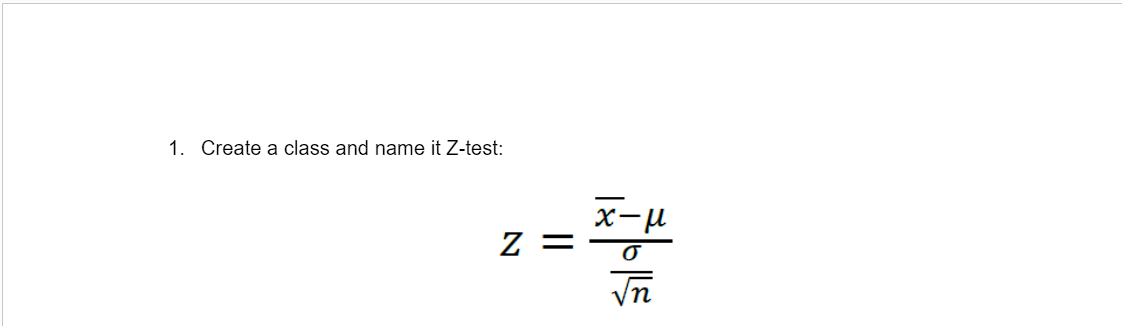

We need 
* sample_data,   
* pop_mean, 
* pop_std and 
* alpha(significance value) as parameters. 
* sample_mean, sample_size(n) can be calculated inside the sample.


The one-tail p-value equals one minus half the two-tailed value. So if the two-tailed p-value is 0.1, the one-tailed p-value is 0.95. The two-tail p-value is twice the one-tail p-value.

In [1]:
import numpy as np
import math
from scipy.stats import norm

In [20]:
class Z_Test:
    def __init__(self, sample_data, pop_mean, pop_std, alpha, tail):
        self.sample_data = sample_data
        self.pop_mean = pop_mean
        self.pop_std = pop_std
        self.alpha = alpha
        self.tail = tail
    def z_score(self):
        sample_size = self.sample_data.size
        sample_mean = self.sample_data.mean().round(2)
        
        #Calculating z-score with the formula above:
        z_score = (sample_mean - self.pop_mean)/(self.pop_std/math.sqrt(sample_size))
        print(f"z_score: {z_score}")
        
        #Calculating p-value using z-score:
        if (self.tail == 2):
            p_value = 2*(1-norm.cdf(abs(z_score)))
        elif (self.tail==1):
            p_value = 1-(1-norm.cdf(abs(z_score)))
        print(f"p-value: {p_value}")
        
        #Decision based on p-value and alpha:
        if p_value > alpha:
            print('Fail to reject H0 (Accept H0). The mean of the population is considered to be equal to', self.pop_mean)
        else:
            print('Reject H0 (Accept H1). The mean of the population is NOT equal to', self.pop_mean)
        

##### Z-test:
Suppose we are testing a new model of cell-phone and want to compare its bandwidth to the previous model.

Sample = [4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428,  4.533, 4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232, 5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42 , 5. , 5.126, 5.082, 4.944, 4.658]

* State the null and alternative hypotheses.
* Use the Z-test to determine whether the new model has a significantly different bandwidth 4.5 GHz from the previous model with a standard deviation of 0.6 GHz, using a significance level of 0.05.
* Interpret the results


In [21]:
# Given:
cellphone_sample = np.array([4.186, 4.439, 4.781, 4.388, 4.947, 4.853, 4.889, 4.682, 4.428, 4.533, 4.557, 4.761, 4.491, 4.334, 4.83 , 4.268, 4.68 , 4.437, 5.382, 5.111, 5.096, 5.232, 5.033, 5.57 , 4.474, 4.789, 4.725, 4.84 , 4.817, 4.438, 4.754, 4.966, 4.285, 4.482, 4.396, 4.418, 4.514, 5.383, 5.264, 4.309, 5.058, 4.392, 4.788, 4.934, 4.967, 4.554, 4.42 , 5. , 5.126, 5.082, 4.944, 4.658])
pop_std = 0.6
pop_mean = 4.5
alpha = 0.05

In [22]:
H0 = "New model has 4.5GHz bandwidth" 
H1 = "New model does not have 4.5GHz bandwidth" #two tailed

In [27]:
z_test_cellphone_bandwidth = Z_Test(sample_data = cellphone_sample, pop_mean = pop_mean, pop_std = pop_std, alpha = alpha, tail=2)

In [28]:
z_test_cellphone_bandwidth.z_score()

z_score: 2.884441020371194
p-value: 0.0039210919990071424
Reject H0 (Accept H1). The mean of the population is NOT equal to 4.5


## T-test

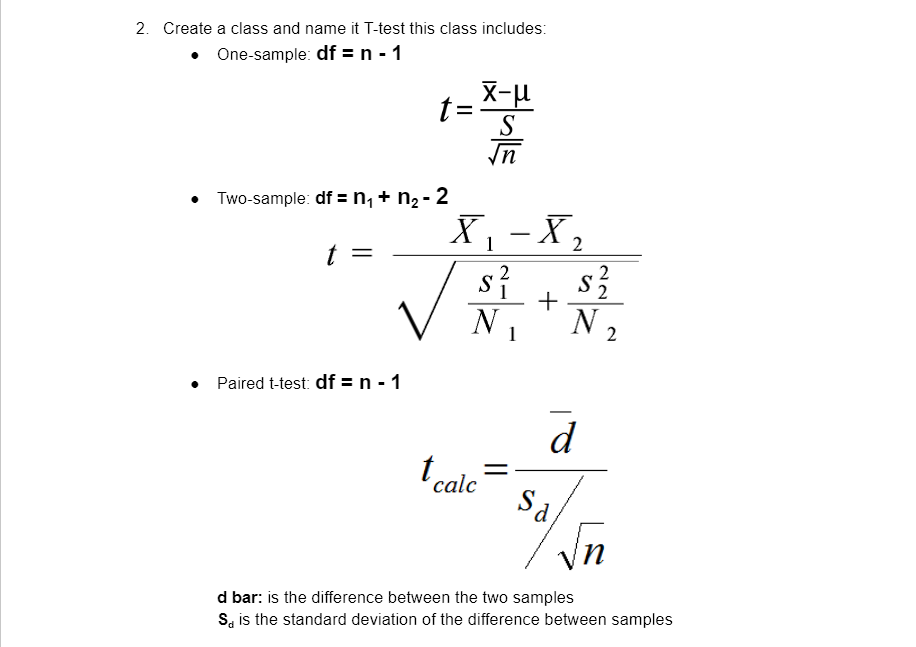